## dc2beta false positive sample analysis

In [99]:
import pandas as pd
import numpy as np

import matplotlib 
%matplotlib inline
from matplotlib import pyplot as plt

from collections import Counter

import seaborn as sns

print("A")

A


## import HMFC

In [134]:
# import table of methylation levels per region for beta samples

# HMFC
df_hmfc = pd.read_csv(open("./Methyl/beta_false_positives/DC2beta_per_sample_per_region - HMFC_CRC.csv", "r"), sep=",", header=None)
df_hmfc.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,seqname,call,chr1,chr1,chr10,chr10,chr10,chr11,chr11,chr11,...,chr5,chr5,chr5,chr6,chr7,chr7,chr7,chr7,chr7,chr7
1,start,na,76867351,107964556,7408095,7408640,99233813,22625104,46295423,47187030,...,77211165,100900429,100902314,72621068,28409711,37447776,99558040,128104085,149714341,149714695
2,end,na,76868897,107965959,7409589,7409622,99234844,22626083,46295887,47187485,...,77211456,100901927,100903900,72623380,28410415,37448798,99558751,128104258,149714615,149715229
3,gene,na,ST6GALNAC5,VAV3-AS1,SFMBT2,SFMBT2,HPSE2,GAS2,CREB3L1,PACSIN3,...,PDE8B,ST8SIA4,ST8SIA4,KCNQ5,CREB5,ELMO1,ZNF655,LRRC4,KRBA1,KRBA1
4,Healthy (19724),NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df_hmfc_regions = df_hmfc.iloc[0:4,:]
df_hmfc.columns = list(df_hmfc.iloc[3,:])
df_hmfc = df_hmfc.iloc[4:,:]

sids = [ int(x.split(" ")[1][1:6]) for x in df_hmfc["gene"]]
labels = [ 0 if x.split(" ")[0]=="Healthy" else 1 for x in df_hmfc["gene"] ]
stages = [ x.split(" ")[0][:-1] for x in df_hmfc["gene"]]
print(Counter(labels))
print(Counter(stages))
sid_to_label = dict(zip(sids, labels))
sid_to_stage = dict(zip(sids, stages))

df_hmfc = df_hmfc.drop(["na","gene"], axis=1)
df_hmfc = df_hmfc.astype(float)
df_hmfc["sids"]=sids
df_hmfc = df_hmfc.set_index("sids")
df_hmfc.head()


Counter({0: 110, 1: 23})
Counter({'Health': 110, 'II': 8, 'III': 6, '': 5, 'I': 2, 'IV': 2})


,ST6GALNAC5,VAV3-AS1,SFMBT2,SFMBT2,HPSE2,GAS2,CREB3L1,PACSIN3,FLI1,FLI1,...,PDE8B,ST8SIA4,ST8SIA4,KCNQ5,CREB5,ELMO1,ZNF655,LRRC4,KRBA1,KRBA1
sids,,,,,,,,,,,,,,,,,,,,,
19724,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20014,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20213,0.0,0.0,0.0,0.0,0.0,0.0,0.003835,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20235,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20244,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
type(df_hmfc.iloc[0,0])

numpy.float64

## import HMFC-isize

In [103]:
df_hmfc_isize = pd.read_csv(open("./Methyl/beta_false_positives/DC2beta_per_sample_per_region - HMFC-isize_CRC.csv", "r"), sep=",", header=None)
df_hmfc_isize.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,seqname,chr7,chr2,chr7,chr2,chr1,chr7,chr12,chr6,chr11,...,chr20,chr20,chr10,chr22,chr6,chr2,chr7,chr2,chr16,chr9
1,start,37447558,181457004,149714340,100417119,107964065,149714695,24561596,72621068,128692960,...,4822675,38805566,22252234,33057901,163413323,144516782,69597369,136117636,23835985,129619982
2,end,37449464,181457950,149715165,100417770,107965974,149715338,24562519,72623380,128694375,...,4823441,38806184,22252788,33058243,163413683,144517016,69598155,136119065,23836675,129620659
3,gene,ELMO1,ITGA4,KRBA1,CHST10,VAV3-AS1,KRBA1,SOX5,KCNQ5,FLI1,...,RASSF2,PPP1R16B,LOC100130992,SYN3,QKI,ZEB2,LOC100507468,CXCR4,PRKCB,C9orf50
4,n_pixles_used,2022.36,1503.48,1484.68,1235.24,1262.24,823.4,657.12,663.8,418.68,...,0.52,0.04,0.04,0,0,0,0,0,0,0
5,region_used,1,1,1,1,1,1,0.92,1,1,...,0.12,0.04,0.04,0,0,0,0,0,0,0
6,average_odds_cancer,6777.323297,4049.316806,3966.435018,3243.985009,3161.206631,1918.176068,1662.993529,1521.81001,1012.311595,...,0.7365548776,0.05764097597,0.0469780362,0,0,0,0,0,0,0
7,Healthy (19724),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Healthy (20014),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Healthy (20213),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_hmfc_isize.columns = list(df_hmfc_isize.iloc[3,:])
#print(df_hmfc_isize.head(10))
df_hmfc_isize_regions = df_hmfc_isize.iloc[0:7,:]
df_hmfc_isize = df_hmfc_isize.iloc[7:,:]
sids = [ int(x.split(" ")[1][1:6]) for x in df_hmfc_isize["gene"]]

df_hmfc_isize = df_hmfc_isize.drop(["gene"], axis=1)
df_hmfc_isize = df_hmfc_isize.astype(float)
df_hmfc_isize["sids"]=sids
df_hmfc_isize = df_hmfc_isize.set_index("sids")
df_hmfc_isize.head()

,ELMO1,ITGA4,KRBA1,CHST10,VAV3-AS1,KRBA1,SOX5,KCNQ5,FLI1,PPP1R16B,...,RASSF2,PPP1R16B,LOC100130992,SYN3,QKI,ZEB2,LOC100507468,CXCR4,PRKCB,C9orf50
sids,,,,,,,,,,,,,,,,,,,,,
19724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## import calls

In [105]:
df_beta_calls = pd.read_csv(open("./Methyl/beta_false_positives/DC2beta Data Table - Final Table.csv", "r"), sep=",")
df_beta_calls = df_beta_calls.set_index("sample_id")
print(df_beta_calls.head())
print(df_beta_calls.columns)

sid_to_hmfc_pred = dict(zip(df_beta_calls.index, df_beta_calls["hmfc.prediction"]))
sid_to_hmfc_isize_pred = dict(zip(df_beta_calls.index, df_beta_calls["hmfc_isize.prediction"]))

sid_to_hmfc_score = dict(zip(df_beta_calls.index, df_beta_calls["hmfc.score"]))
sid_to_hmfc_isize_score = dict(zip(df_beta_calls.index, df_beta_calls["hmfc_isize.score"]))

           sample_metadata.stage sample_metadata.lesion_location  \
sample_id                                                          
22716                        NaN                 Hepatic flexure   
23718                        NaN                   Sigmoid colon   
23591                        NaN                   Sigmoid colon   
23577                        NaN                   Sigmoid colon   
23471                        NaN                 Hepatic flexure   

           sample_metadata.tumor_size_mm sample_metadata.cancer_type  \
sample_id                                                              
22716                                5.0           Colorectal Benign   
23718                                2.0           Colorectal Benign   
23591                                4.0           Colorectal Benign   
23577                                3.0           Colorectal Benign   
23471                                5.5           Colorectal Benign   

          sample_m

## heatmaps of region values

<Figure size 720x720 with 0 Axes>

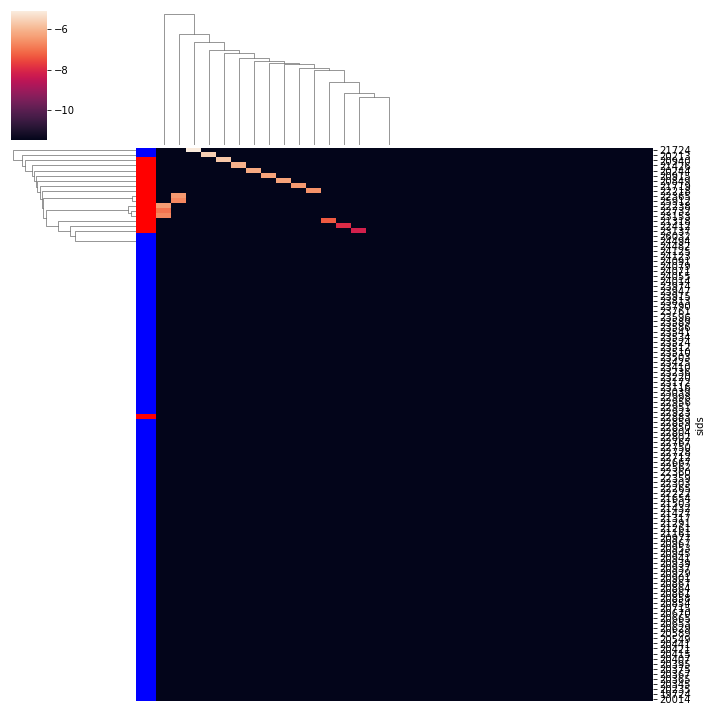

In [120]:
# heatmap hmfc for healthies
healthies = [ sid_to_label[sid]==0 for sid in df_hmfc.index]
df_hmfc_0 = df_hmfc[healthies]

pred_labels = [sid_to_hmfc_pred[sid] for sid in df_hmfc_0.index]
#print(pred_labels)
pred_label_colors = ["red" if x==1 else "blue" for x in pred_labels]
#print(pred_label_colors)


plt.figure(figsize=(10,10))
cg_hmfc = sns.clustermap(np.log(df_hmfc_0 + .00001),
                 row_cluster=True, col_cluster=True,
                 metric='euclidean',
                 yticklabels=True,
                 xticklabels=False,
                 row_colors= [pred_label_colors
                             ],
                 )
cg.ax_col_dendrogram.set_visible(True) # remove col dendrogram

In [148]:
## find sample and region with noise:
sid_order = cg_hmfc.dendrogram_row.reordered_ind
#print(cg_hmfc.dendrogram_row.reordered_ind)

sids = pd.Series(df_hmfc_0.index, index=range(len(df_hmfc_0)))
#print(sids)
sids_ordered = (sids[sid_order])

#print(df_hmfc_regions.head())
df_hmfc_regions2 = df_hmfc_regions.iloc[:,2:]
regions = df_hmfc_regions2.apply(lambda x: f"{x[0]}:{x[1]}-{x[2]}", axis=0)
#print(regions[0:3])

df_hmfc_0.columns = regions
regions = pd.Series(df_hmfc_0.columns, index=range(df_hmfc_0.shape[1]))
regions_ordered = regions[cg_hmfc.dendrogram_col.reordered_ind]
#print(regions_ordered)

# sample with noise:
#sample 11, region 2
sample_11 = sids_ordered[10]
region_2 = regions_ordered[1]
print(sample_11)
print(region_2)

#sample 12, region 1
sample_12 = sids_ordered[11]
region_1 = regions_ordered[0]

20407
chr1:107964556-107965959


<Figure size 720x720 with 0 Axes>

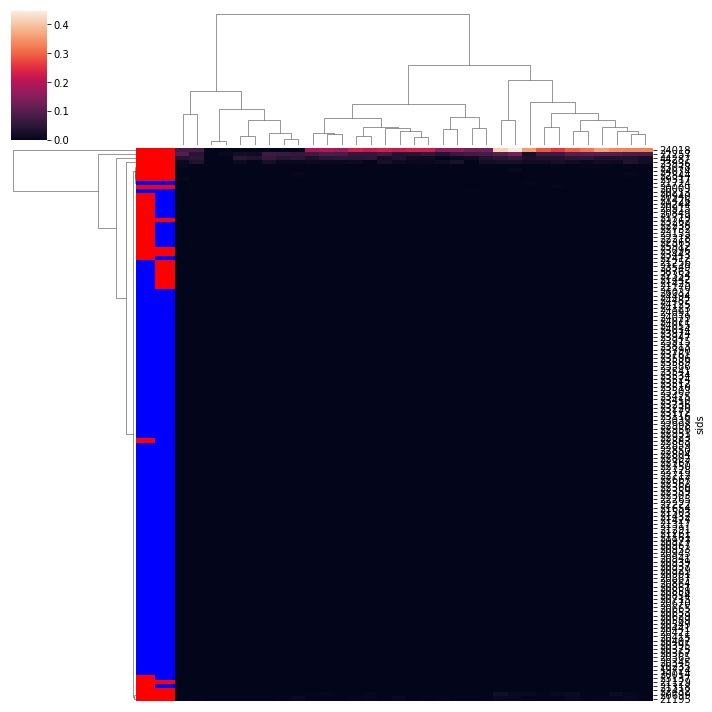

In [94]:
# heatmap hmfc for all samples
#healthies = [ sid_to_label[sid]==0 for sid in df_hmfc.index]
#df_hmfc_0 = df_hmfc[healthies]

pred_labels = [sid_to_hmfc_pred[sid] for sid in df_hmfc.index]
#print(pred_labels)
pred_label_colors = ["red" if x==1 else "blue" for x in pred_labels]
#print(pred_label_colors)

true_labels = [sid_to_label[sid] for sid in df_hmfc.index ]
true_label_colors = ["red" if x==1 else "blue" for x in true_labels]


plt.figure(figsize=(10,10))
cg = sns.clustermap(df_hmfc,
                 row_cluster=True, col_cluster=True,
                 metric='euclidean',
                 yticklabels=True,
                 xticklabels=False,
                 row_colors= [pred_label_colors,
                              true_label_colors
                             ],
                 )
cg.ax_col_dendrogram.set_visible(True) # remove col dendrogram

<Figure size 720x720 with 0 Axes>

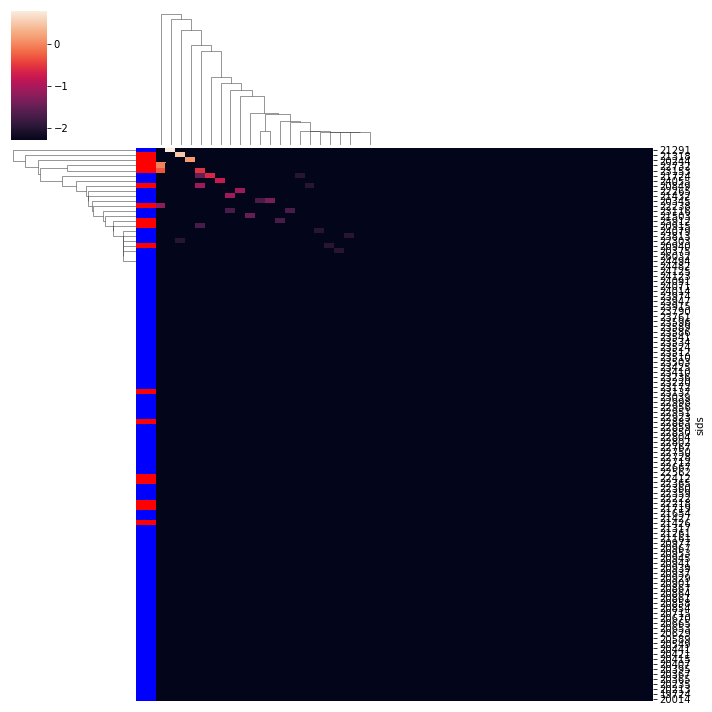

In [95]:
# heatmap hmfc_isize for healthies
healthies = [ sid_to_label[sid]==0 for sid in df_hmfc_isize.index]
df_hmfc_isize_0 = df_hmfc_isize[healthies]

pred_labels = [sid_to_hmfc_pred[sid] for sid in df_hmfc_isize_0.index]
#print(pred_labels)
pred_label_colors = ["red" if x==1 else "blue" for x in pred_labels]
#print(pred_label_colors)


plt.figure(figsize=(10,10))
cg = sns.clustermap(np.log(df_hmfc_isize_0 + 0.1),
                 row_cluster=True, col_cluster=True,
                 metric='euclidean',
                 yticklabels=True,
                 xticklabels=False,
                 row_colors= [pred_label_colors
                             ],
                 )
cg.ax_col_dendrogram.set_visible(True) # remove col dendrogram

## boxplots of average methylation

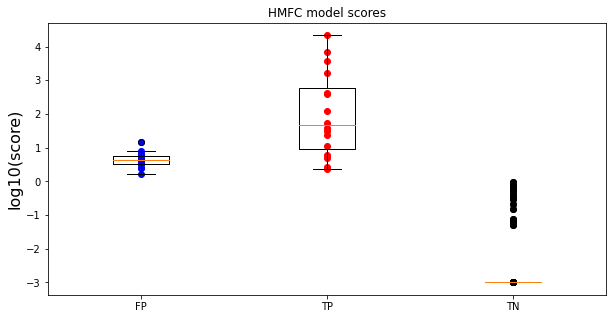

In [114]:
# HMFC box plot total counts true positives, false positives, true negatives.

pred_labels_hmfc = [sid_to_hmfc_pred[sid] for sid in df_hmfc.index]
true_labels_hmfc = [sid_to_label[sid] for sid in df_hmfc.index ]
assert len(pred_labels_hmfc)==len(true_labels_hmfc)

true_positives = [ a==1 and b==1 for a,b in zip(true_labels_hmfc, pred_labels_hmfc)]
false_positives = [ a==0 and b==1 for a,b in zip(true_labels_hmfc, pred_labels_hmfc)]
true_negatives = [ a==0 and b==0 for a,b in zip(true_labels_hmfc, pred_labels_hmfc)]

#avg_reg_vals_hmfc = np.array(np.log(df_hmfc.apply(np.mean, axis=1) + .0001))
hmfc_scores = np.log10(np.array([sid_to_hmfc_score[sid] for sid in df_hmfc.index])+0.001)
assert len(true_positives)==len(hmfc_scores)

data = [hmfc_scores[false_positives],
        hmfc_scores[true_positives],
        hmfc_scores[true_negatives],
       ]

plt.figure(figsize=(10,5))
bplot = plt.boxplot(data, patch_artist=False, labels=["FP","TP","TN"])
#plt.legend()
# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen']
#colors = ["red","blue","black"]
#for patch, color in zip(bplot['boxes'], colors):
#    patch.set_facecolor(color)\
plt.ylabel("log10(score)", size=16)
plt.title("HMFC model scores")

plt.scatter(x=[1]*len(hmfc_scores[false_positives]),y=hmfc_scores[false_positives], marker="o", color="blue")
plt.scatter(x=[2]*len(hmfc_scores[true_positives]),y=hmfc_scores[true_positives], marker="o", color="red")
plt.scatter(x=[3]*len(hmfc_scores[true_negatives]),y=hmfc_scores[true_negatives], marker="o", color="black")## find hmfc and hmfc_isize overlapping regions



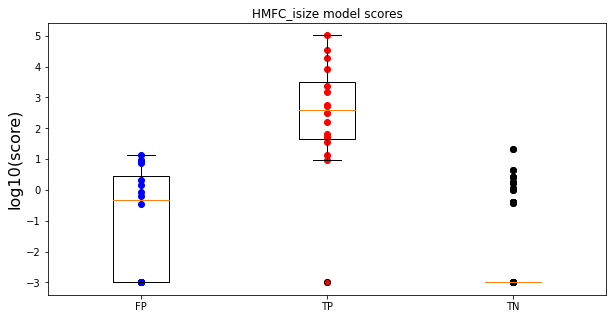

In [113]:
# HMFC_ISIZE box plot total counts true positives, false positives, true negatives.

pred_labels_hmfc_isize = [sid_to_hmfc_pred[sid] for sid in df_hmfc_isize.index]
true_labels_hmfc_isize = [sid_to_label[sid] for sid in df_hmfc_isize.index ]
assert len(pred_labels_hmfc_isize)==len(true_labels_hmfc_isize)

true_positives = [ a==1 and b==1 for a,b in zip(true_labels_hmfc_isize, pred_labels_hmfc_isize)]
false_positives = [ a==0 and b==1 for a,b in zip(true_labels_hmfc_isize, pred_labels_hmfc_isize)]
true_negatives = [ a==0 and b==0 for a,b in zip(true_labels_hmfc_isize, pred_labels_hmfc_isize)]

#avg_reg_vals_hmfc_isize = np.array(np.log(df_hmfc_isize.apply(np.mean, axis=1) + .0001))
hmfc_isize_scores = np.log10(np.array([sid_to_hmfc_isize_score[sid] for sid in df_hmfc_isize.index])+0.001)
assert len(true_positives)==len(hmfc_isize_scores)

data = [hmfc_isize_scores[false_positives],
        hmfc_isize_scores[true_positives],
        hmfc_isize_scores[true_negatives],
       ]

plt.figure(figsize=(10,5))
bplot = plt.boxplot(data, patch_artist=False, labels=["FP","TP","TN"])
#plt.legend()
# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen']
#colors = ["red","blue","black"]
#for patch, color in zip(bplot['boxes'], colors):
#    patch.set_facecolor(color)\
plt.ylabel("log10(score)", size=16)
plt.title("HMFC_isize model scores")

plt.scatter(x=[1]*len(hmfc_isize_scores[false_positives]),y=hmfc_isize_scores[false_positives], marker="o", color="blue")
plt.scatter(x=[2]*len(hmfc_isize_scores[true_positives]),y=hmfc_isize_scores[true_positives], marker="o", color="red")
plt.scatter(x=[3]*len(hmfc_isize_scores[true_negatives]),y=hmfc_isize_scores[true_negatives], marker="o", color="black")## find hmfc and hmfc_isize overlapping regions


## get bam addresses from sample ids

In [116]:
from calzone import Calzone
from featureio import FeatureIO

In [118]:
with FeatureIO() as ftio:
    print(ftio.get_datasets_for_training_class("colorectal_healthy_targetmethyl1_strict_discovery2beta_v1"))
    dsids = ftio.get_datasets_for_training_class("colorectal_healthy_targetmethyl1_strict_discovery2beta_v1")

['SD-00009BB1', 'SD-00009BB7', 'SD-00009BBD', 'SD-00009BBE', 'SD-00009BC1', 'SD-00009BC6', 'SD-00009BC9', 'SD-00009BCA', 'SD-00009BCC', 'SD-00009BCD', 'SD-00009BCF', 'SD-00009BD4', 'SD-00009BD5', 'SD-00009BD7', 'SD-00009BDF', 'SD-00009BE5', 'SD-00009BE7', 'SD-00009BE9', 'SD-00009BEB', 'SD-00009BEC', 'SD-00009BF0', 'SD-00009BF1', 'SD-00009BF3', 'SD-00009BF4', 'SD-00009BF6', 'SD-00009BF8', 'SD-00009BF9', 'SD-00009BFD', 'SD-00009BFE', 'SD-00009C00', 'SD-00009C01', 'SD-00009C02', 'SD-00009C05', 'SD-00009C07', 'SD-00009C0A', 'SD-00009C0C', 'SD-00009C10', 'SD-00009C17', 'SD-00009C19', 'SD-00009C1A', 'SD-00009C1C', 'SD-00009C1E', 'SD-00009C1F', 'SD-00009C24', 'SD-00009C26', 'SD-00009C28', 'SD-00009C2B', 'SD-00009C30', 'SD-00009C32', 'SD-00009C33', 'SD-00009C38', 'SD-00009C3D', 'SD-00009C40', 'SD-00009C42', 'SD-00009C44', 'SD-00009C46', 'SD-00009C49', 'SD-00009C4A', 'SD-00009C4F', 'SD-00009C50', 'SD-00009C53', 'SD-00009C54', 'SD-00009C55', 'SD-00009C5D', 'SD-00009C5F', 'SD-00009C62', 'SD-00009

In [ ]:
metadata = Calzone.get_dataset_metadata_with_ids(dsids)

In [142]:
sid_to_file = dict([(d.raw_dataset_metadata['dataset']['sample_id'],d.raw_dataset_metadata['dataset']['raw_data_path']) for d in metadata])
print(sid_to_file.keys())

dict_keys([20345, 22732, 22923, 23589, 20937, 24071, 25912, 23503, 23153, 23586, 20415, 20549, 22728, 20967, 20665, 24123, 22218, 21318, 26032, 20367, 23947, 23915, 20213, 20441, 22359, 20407, 20929, 22265, 23410, 21427, 24079, 23425, 23790, 20670, 20858, 20235, 22712, 20940, 20014, 20867, 23512, 22956, 23541, 24482, 22804, 22667, 20953, 22850, 20854, 24014, 22883, 22750, 20715, 22562, 23524, 21161, 23137, 23761, 23534, 20939, 22412, 20864, 20653, 22951, 20977, 20244, 23236, 22365, 22859, 24091, 22998, 23510, 20945, 20395, 21432, 22802, 23974, 22360, 20421, 20629, 23172, 23039, 22303, 21719, 21261, 22767, 20365, 21317, 20861, 21654, 23596, 20849, 20915, 20589, 23116, 23813, 20375, 22238, 20941, 24494, 21291, 19724, 20901, 21724, 22222, 21503, 24125, 21426, 23220, 24055])


In [146]:
print(sid_to_file[sample_11])
print(region_2)
print(sample_11)

gs://seq-data-us-1/bam/200130_A00231_0371_BHWHKFDSXX/cbf0463d-3c2d-587f-853c-a09523378d08/S_23_I_23-23_ATGACAGG-ATGACAGG_S23.marked.bam
chr1:107964556-107965959
20407


In [149]:
print(sid_to_file[sample_12])
print(region_1)
print(sample_12)

gs://seq-data-us-1/bam/200130_A00231_0371_BHWHKFDSXX/cbf0463d-3c2d-587f-853c-a09523378d08/S_30_I_30-30_TAACGTCG-TAACGTCG_S30.marked.bam
chr1:76867351-76868897
20415


In [119]:

print(metadata[0])

CalzoneDatasetMetadata(raw_dataset_metadata={'dataset': {'sample_id': 20345, 'id': 'SD-00009BB1', 'raw_data_path': 'gs://seq-data-us-1/bam/200130_A00231_0371_BHWHKFDSXX/cbf0463d-3c2d-587f-853c-a09523378d08/S_37_I_37-37_GGCGAATA-GGCGAATA_S37.marked.bam', 'assay': 'TEM-Seq', 'assay_version': 1, 'analyte': 'cfDNA', 'creation_datetime': '2020-02-02T06:43:41+00:00', 'cr_assay_metadata': 'methyl_dataset_metadata', 'passed_latest_qc': True, 'metadata_dump': '{"bait_set": "methyl_panel_v3"}', 'collection_tube_type': None}, 'lims_batch': {'name': 'DC2_BG1_TEMSeq_5', 'id': 507, 'assay': None, 'assay_version': None, 'analyte': None}, 'sequencing': {'plate_position': 37, 's2_s4': 's2', 'sequencing_id': 'S_37_I_37-37_GGCGAATA-GGCGAATA_S37', 'flowcells': 'A00231_BHWHKFDSXX', 'scrubbed_flowcells': 'HWHKFDSXX', 'bam_id': '200130_A00231_0371_BHWHKFDSXX_S_37_I_37-37_GGCGAATA-GGCGAATA_S37', 'median_sequencing_date': '2020-01-30T16:32:00+00:00'}, 'balrog': {'merge_date': None, 'balrog_run_uuid': 'cbf0463d